<a href="https://colab.research.google.com/github/matiasvallejosdev/probabilidad-estadistica/blob/main/medidas_posicion_dispersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medidas de posicion y dispercion
Estadistica, Variable datos, Diagramas, Relacion entre Media, Mediana y Moda, Distribucion de intervalos de clases, Grafico de frecuencias acumuladas, Ojiva, Valores de dispercion, Coeficiente de variacion, Cuartiles y percentiles.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

## Helper

#### Medias de posicion y dispersion

1. Definir la muestra (X_muestra)
2. Ejecutar celda de pandas
3. Calcular rango
4. Ejecutar medidas de posicion (Definiendo INTERVALO)
5. Ejecutar medidas de dispersion

In [27]:
X_muestra = np.array([2,2,4,4,4,4,6,6,6,6,6,6,6,8,8,8,8,8,8,8,8,8,8,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,12,12,12,12,12,12,12,12,14,14,14,16,16,16,16])

X_muestra = np.sort(X_muestra, axis=None)
n = X_muestra.size

print("Muestra: ", X_muestra)
print("\nTotal: ", n)
print("Menor: ", np.min(X_muestra))
print("Mayor: ", np.max(X_muestra))

Muestra:  [ 2  2  4  4  4  4  6  6  6  6  6  6  6  8  8  8  8  8  8  8  8  8  8 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 12 12 12
 12 12 12 12 12 14 14 14 16 16 16 16]

Total:  60
Menor:  2
Mayor:  16


In [28]:
# Describe data (Quartiles, min, max, media, count)
data = pd.Series(X_muestra)
data.describe()

count    60.000000
mean      9.400000
std       3.258366
min       2.000000
25%       8.000000
50%      10.000000
75%      10.500000
max      16.000000
dtype: float64

In [29]:
# b) Tabla frecuencias
# Muestra:

R = np.max(X_muestra) - np.min(X_muestra)
K = 1 + 3.322 * np.log10(X_muestra.size) # np.round(UP) or np.floor(DOWN)
A = (R / K) 

print("Rango: ", R)
print("\nIntervalo: ", K)
print("\nAmplitud: ", A)

Rango:  14

Intervalo:  6.907018453774464

Amplitud:  2.0269237868257686


In [31]:
intervalo = np.array([1,3,5,7,9,11,13,15,17]) # Definir intervalo de clases

frec, bins = np.histogram(X_muestra, bins=intervalo) # Frecuencia definida por numpy
print("Frecuencia: ", frec)
print("\nIntervalo: ", bins)

frec_relativa = frec / np.sum(X_muestra.size)
print("\nFrecuencia relativa: ", frec_relativa)

frec_relativa_porcentual = frec_relativa * 100
print("\nFrecuencia relativa(%): ", frec_relativa_porcentual)

Frecuencia:  [ 2  4  7 10 22  8  3  4]

Intervalo:  [ 1  3  5  7  9 11 13 15 17]

Frecuencia relativa:  [0.03333333 0.06666667 0.11666667 0.16666667 0.36666667 0.13333333
 0.05       0.06666667]

Frecuencia relativa(%):  [ 3.33333333  6.66666667 11.66666667 16.66666667 36.66666667 13.33333333
  5.          6.66666667]


In [32]:
# c) 
# Media mediana y moda
# Muestra 

media = (np.sum(X_muestra) / np.sum(frec))
print("Media: ", media)

print("\nMediana: ", np.median(X_muestra))

moda = st.mode(X_muestra)
print("\nModa: ", moda)

Media:  9.4

Mediana:  10.0

Moda:  ModeResult(mode=array([10]), count=array([22]))


In [33]:
# Valores de dispercion
dm = np.sum(np.abs(X_muestra - media)) / X_muestra.size # la suma del valor absouluto menos el promedio dividido entre el tamaño de muestra
print("\nDesviacion media: ", dm)

S = np.sum(np.square(X_muestra - media)) / X_muestra.size # Varianza
print("\nVarianza: ", S)

de = np.sqrt(S) # Desvio estandar
print("\nDesvio estandar: ", r)

coeficientevar = (de / media) * 100
print("\nCoeficiente de variacion: ", coeficientevar)


Desviacion media:  2.473333333333333

Varianza:  10.439999999999998

Desvio estandar:  6.317467847167883

Coeficiente de variacion:  34.37339238596492


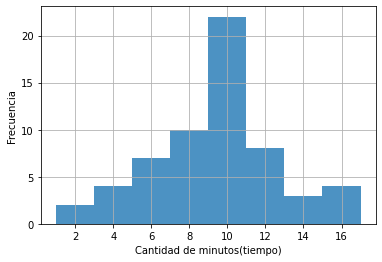

In [34]:
# Histograma de frecuencias

plt.hist(X_muestra, bins=intervalo, alpha=0.8)
plt.grid(True)
plt.xlabel("Cantidad de minutos(tiempo)")
plt.ylabel("Frecuencia")

# Pie de frecuencias
# fig, ax = plt.subplots(figsize=(7,7))
# ax.pie(frec, labels=[1, 2, 3, 4, 5], autopct='%.2f%%',shadow=True, labeldistance=1.1)
plt.show()

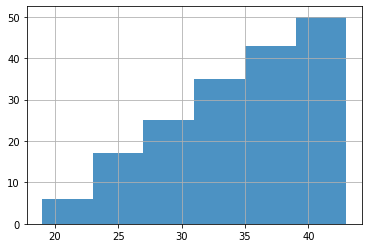

<Figure size 432x288 with 0 Axes>

In [12]:
# Histograma de frecuencias acumuladas
 
plt.hist(X_muestra, bins=intervalo, cumulative=True, alpha=0.8)
plt.grid(True)
plt.show()
plt.clf()

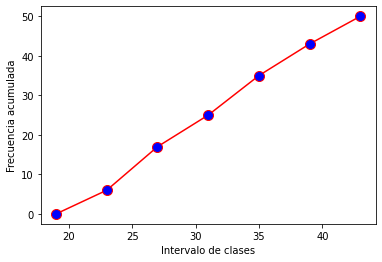

In [25]:
# Poligono de frecuencias acumuladas (Ojiva)

frec_acumulada = np.array([0, 6, 17, 25, 35, 43, 50]) # Frecuencia acumulada **definir

plt.plot(intervalo, frec_acumulada, c='r', marker='o', ms=10, mfc='blue')
plt.xlabel('Intervalo de clases')
plt.ylabel('Frecuencia acumulada')

#plt.savefig('Actividad 3 Ojiva (Muestra).png')
plt.show()

In [26]:
# Quartiles
Q3 = 3 * np.sum(frec) / 4
print("Posicion Q3: ", Q3)

Q2 = 2 * np.sum(frec) / 4
print("Posicion Q2: ", Q2)

Q1 = 1 * np.sum(frec) / 4
print("Posicion Q1: ", Q1)

print("\nValor Q3: ", np.percentile(X_muestra, 75))
print("Valor Q2: ", np.percentile(X_muestra, 50))
print("Valor Q1: ", np.percentile(X_muestra, 25))

Posicion Q3:  37.5
Posicion Q2:  25.0
Posicion Q1:  12.5

Valor Q3:  35.0
Valor Q2:  30.5
Valor Q1:  25.25


In [ ]:
# Percentiles 
print(np.percentile(X_muestra, [0, 10, 20, 30, 40, 50, 60, 70 ,80, 90, 100]))

[0.2  0.4  0.6  0.8  1.   1.1  1.3  1.63 1.82 2.53 5.2 ]


#### Media, Mediana y Moda

In [ ]:
# Media, mediana y moda

x = np.array([42,47,53,47,50,45,46,48,41,49,45,40,54])
print('Data: {}'.format(x))

media = np.sum(x) / len(x)
print('Media: {}'.format(media))

mediana = np.median(x)
print('Mediana: {}'.format(mediana))

moda = st.mode(x)
print('Moda: {} / {}'.format(moda.mode, moda.count))

Data: [42 47 53 47 50 45 46 48 41 49 45 40 54]
Media: 46.69230769230769
Mediana: 47.0
Moda: [45] / [2]


#### Histograma de frecuencias

In [ ]:
# Histograma de frecuencias
x = np.array([2,2,4,4,4,4,6,6,6,6,6,6,8,8,8,8,8,8,8,8,8,8,9,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,12,12,12,12,12,12,12,12,14,14,14,16,16,16,16])
frec = np.array([2,4,7,10,22,8,3,4])

intervalo = np.array([1,3,5,7,9,11,13,15,17])

# Muestra
plt.hist(x, bins=intervalo)
plt.grid(True)
plt.xlabel("Cantidad de minutos(tiempo)")
plt.ylabel("Frecuencia")

plt.savefig('Actividad d) parcial-histograma')

# Pie de frecuencias
fig, ax = plt.subplots(figsize=(7,7))
ax.pie(frec, labels=[1, 2, 3, 4, 5, 6, 7, 8], autopct='%.2f%%',shadow=True, labeldistance=1.1)

plt.savefig('Actividad d) parcial-pie')

plt.show()

## TID (Sp1 a Sp8)

### Sp1 / h2 : variable datos

#### Valores estadisticos:

In [ ]:
edad = pd.array([16,16,16,17,17,17,17,17,17,18,18,18,19,20])

lenArray = len(edad)

media = np.sum(edad) / len(edad)
mediana = 17 #impar
moda = 17 #repeticion 6 veces

print("Cantidad de datos:", lenArray)
print("Media edad:", media)
print("Mediana edad:", mediana)
print("Moda edad:", moda)

Cantidad de datos: 14
Media edad: 17.357142857142858
Mediana edad: 17
Moda edad: 17


In [ ]:
# x = max - min
rango = 20 - 16
# x = (x - m)2 / media
varianza = np.sum(np.square(edad - media)) / lenArray
# x = _/varianza
desviacionEstandar = np.sqrt(varianza)
# x = desviacionEstandar / media
coeficienteVariacion = (desviacionEstandar / media) * 100

print("Rango edad:", rango)
print("Desviacion estandar edad:", desviacionEstandar)
print("Varianza edad:", varianza)
print("Coeficiente variacion: " + str(coeficienteVariacion) + "%")

Rango edad: 4
Desviacion estandar edad: 1.1088696211614302
Varianza edad: 1.2295918367346936
Coeficiente variacion: 6.3885492577201735%


#### Serie de frecuencias:

In [ ]:
# 16, 18, 14, 15, 17
# 14, 19, 18, 20, 21
# 17, 15. 16. 18, 16
# 18, 17, 15, 19, 18
# 17, 20, 18, 20, 17
# 18, 19, 21, 18, 19

x = np.array([14,15,16,17,18,19,20,21])
print('\nDatos:', x)

f = np.array([2, 3, 3, 5, 8, 4, 3, 2])      # 30
print('\nTotal frecuencia:', np.sum(f))
print('\nFrecuencia:', f)

fr = f / np.sum(f)
p = np.dot(np.sum(fr), 100)

print('\nFrecuencia relativa:', fr)
print('\nPorcentaje:', p)


Datos: [14 15 16 17 18 19 20 21]

Total frecuencia: 30

Frecuencia: [2 3 3 5 8 4 3 2]

Frecuencia relativa: [0.06666667 0.1        0.1        0.16666667 0.26666667 0.13333333
 0.1        0.06666667]

Porcentaje: 100.0


#### Serie de frecuencias por intervalos agrupados:

In [ ]:
X = np.array([[22, 19, 16, 13, 18, 15, 20, 14, 15, 16], [15, 16, 20, 13, 15, 18, 15, 13, 18, 15]])
print('Data: {}'.format(X))

datos = X.shape[1] * X.shape[0]
print('Shape[1] * Shape[0]: {}'.format(datos)) # Lenght of X

rango = 22 - 13
print('Rango: {}'.format(rango))

intervalos = 1 + 3.322 * np.log10(datos)
print('Intervalos: {}'.format(intervalos))

amplitud = rango / intervalos
print('Amplitud: {}'.format(amplitud))

Data: [[22 19 16 13 18 15 20 14 15 16]
 [15 16 20 13 15 18 15 13 18 15]]
Shape[1] * Shape[0]: 20
Rango: 9
Intervalos: 5.322021645595746
Amplitud: 1.6910866958701634


### Sp2 / h1 : diagramas

In [ ]:
# Define datos

x = np.array([19, 19,20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21 ,21 ,21 ,22, 22, 22, 22, 22 ,22 ,22, 23, 23, 23, 24, 24, 25])
print(x)

[19 19 20 20 20 20 20 20 21 21 21 21 21 21 21 21 21 22 22 22 22 22 22 22
 23 23 23 24 24 25]


In [ ]:
# Serie de frecuencias

xmarca = np.array([20, 22, 24])
frec = np.array([2,6,9,7,3,2,1]) # frecuencia intervalo 1

frecrelativa = frec / np.sum(frec) # frecuencia relativa ^

frecabsoluta = np.array([2, 8, 15, 23, 26, 28, 29]) # frecuencia absoluta

intervalo1 = np.array([19,20,21,22,23,24,25]) # intervalo 1

print(xmarca)
print(frec)
print(frecrelativa)
print(frecabsoluta)
print(intervalo1)

[20 22 24]
[2 6 9 7 3 2 1]
[0.06666667 0.2        0.3        0.23333333 0.1        0.06666667
 0.03333333]
[ 2  8 15 23 26 28 29]
[19 20 21 22 23 24 25]


In [ ]:
# Serie de frecuencias por intervalos procedimientos

rango = np.max(x) - np.min(x) 
intervalo = np.floor(1 + 3.322 * np.log10(len(x)))
amplitud = rango / intervalo

intervalo2 = np.array([[19, 21], [21, 23], [23, 25]]) # intervalo 2.0

print(rango)
print(intervalo)
print(amplitud)
print(intervalo2)

6
5.0
1.2
[[19 21]
 [21 23]
 [23 25]]


In [ ]:
# Histograma en numpy
a = np.arange(len(frec))
hist = np.histogram(x)

print(a)
print(hist[0]) # frecuencia intervalo 0.6
print(hist[1]) # intervalo 0.6

[0 1 2 3 4 5 6]
[2 6 0 9 0 7 3 0 2 1]
[19.  19.6 20.2 20.8 21.4 22.  22.6 23.2 23.8 24.4 25. ]


#### Diagrama de barras:

<BarContainer object of 7 artists>

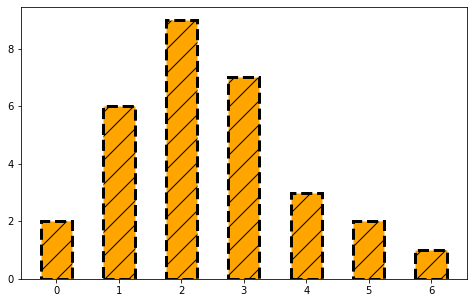

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(a,frec,width=0.5, hatch='/', edgecolor='black', ls='--', linewidth=3, color='orange')

#### Pie:

([<matplotlib.patches.Wedge at 0x7f2a710d4ed0>,
 [Text(1.075962358309037, 0.22870287165240302, ''),
  Text(0.5499999702695115, 0.9526279613277875, ''),
  Text(-0.9526279870751434, 0.5499999256737774, ''),
  Text(-0.44741018820837447, -1.0049000564669837, ''),
  Text(0.646563890003987, -0.8899186120892812, ''),
  Text(1.0049000669393746, -0.4474101646869913, ''),
  Text(1.093974103116432, -0.11498113632504307, '')],
 [Text(0.5868885590776565, 0.12474702090131072, '6.67%'),
  Text(0.2999999837833699, 0.5196152516333385, '20.00%'),
  Text(-0.5196152656773508, 0.299999959458424, '30.00%'),
  Text(-0.24404192084093151, -0.5481273035274455, '23.33%'),
  Text(0.3526712127294474, -0.48541015204869875, '10.00%'),
  Text(0.5481273092396588, -0.2440419080110861, '6.67%'),
  Text(0.5967131471544175, -0.06271698345002348, '3.33%')])

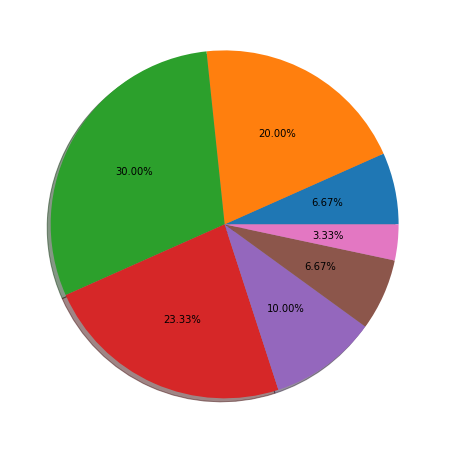

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(frec, autopct='%.2f%%',shadow=True, labeldistance=1.1)

#### Histogramas:

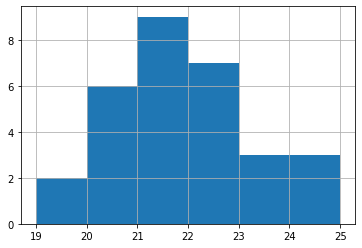

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.hist(x, bins=intervalo1)
plt.grid(True)
plt.show()
plt.clf()

### Sp3 / h1 : distribucion de intervalos de clases

In [ ]:
# Mayor > 20
X = np.array([[22, 19, 16, 13, 18, 15, 20, 14, 15, 16], [15, 16, 20, 13, 15, 18, 15, 13, 18, 15]])
print(X)

count = X.shape[0] * X.shape[1] # total
print(count)

rango = np.max(X) - np.min(X) # rango
print(rango)

z = 1 + 3.322 * np.log10(count) # intervalo
print(z)

A = rango / z # amplitud
print(A)

[[22 19 16 13 18 15 20 14 15 16]
 [15 16 20 13 15 18 15 13 18 15]]
20
9
5.322021645595746
1.6910866958701634


In [ ]:
Xe = np.array([[58, 50, 56, 56, 58],
              [58, 56, 63, 50, 63],
              [68, 63, 64, 64, 53],
              [60, 68, 65, 63, 61],
              [55, 65, 56, 63, 52],
              [57, 60, 59, 58, 64]])
print(Xe)

r = np.max(Xe) - np.min(Xe)
print("\nRango: ", r)

z = np.floor(1 + 3.332 * np.log10(Xe.size)) # Redondeamos a impar (np.floor)
print("\nIntervalos: ", z)

A = np.round(r / z) # Redondeamos al mas cercano (np.round)
print("\nAmplitud:", A)

Nr = (A * z) - r # Nuevo rango
print("\nNuevo rango: ", Nr)

[[58 50 56 56 58]
 [58 56 63 50 63]
 [68 63 64 64 53]
 [60 68 65 63 61]
 [55 65 56 63 52]
 [57 60 59 58 64]]

Rango:  18

Intervalos:  5.0

Amplitud: 4.0

Nuevo rango:  2.0


In [ ]:
rang = np.array([49, 53, 57, 61, 65, 69]) # Rango
print(rang)

Xi = np.array([51, 55, 59, 63, 67]) # lI - LS / 2 (Promedio marca de clase)
print(Xi)

f = np.array([3, 6, 8, 9, 4]) # Frecuencia (rango 4) f > X
print(f) # == total

frec, bins_edge = np.histogram(Xe, bins = rang) # Frecuencia definida por numpy
print(np.sum(frec)) 

fr = frec / np.sum(Xe.size) # Frecuencia relativa f1 / n
print(fr) # == 1

fA = np.array([3,9,17,26,30]) # Acumulacion de frecuencias 
print(fA) # == (3, 3+9, 3+9+8, 3+9+8+9, 3+9+8+9+4) 

[49 53 57 61 65 69]
[51 55 59 63 67]
[3 6 8 9 4]
30
[0.1        0.2        0.26666667 0.3        0.13333333]
[ 3  9 17 26 30]


### Sp4 / h1 : frecuencia acumulada

### Sp5 / h1 : valores de dispersion (Tabla frecuencia: valores agrupados)

**Formulas:**

- [Media](http://tid.ies21.edu.ar/145/me/105_145_mm.jpg)
- [Desvio Medio](http://tid.ies21.edu.ar/145/me/108_145_mm.jpg)
- [Varianza](http://tid.ies21.edu.ar/145/me/109_145_mm.jpg)
- [Desvio estandar](http://tid.ies21.edu.ar/145/me/113_145_mm.jpg)

In [ ]:
# Rango == Max - Min
# Desviacion media == ∑ Xi - X / n

e = np.array([3,0,1,0,2,0,1])
print("\nDatos: ", e)

p = np.sum(e) / e.size
print("\nPromedio: ", p)

dm = np.sum(np.abs(e - p)) / e.size # la suma del valor absouluto menos el promedio dividido entre el tamaño
print("\nDesviacion media: ", dm)


Datos:  [3 0 1 0 2 0 1]

Promedio:  1.0

Desviacion media:  0.8571428571428571


In [ ]:
# Varianza  ==    ∑ (Xi - X) ** 2 / n    |o|     ∑ (Xi - X) ** 2 / (n - 1)       
# Desvio estandar ==  _/varianza

e = np.array([5,6,6,7,8]) # Datos
print("\nDatos: ", e)

p = np.sum(e) / e.size # Promedio
print("\nPromedio: ", p)

S = np.sum(np.square(e - p)) / e.size # Varianza
print("\nVarianza^2: ", S)

r = np.sqrt(S) # Desvio estandar
print("\nDesvio estandar: ", r)


Datos:  [5 6 6 7 8]

Promedio:  6.4

Varianza^2:  1.0399999999999998

Desvio estandar:  1.0198039027185568


### Sp6 / h1 : coeficiente de variacion (Tabla frecuencia: valores agrupados)

**Formulas:**

- [Coeficiente de variacion](http://tid.ies21.edu.ar/145/me/399_145_mm.jpg)

In [ ]:
# Coeficiente de variacion == (desviacionestandar / promedio) * 100

x = 174.0 # promedio
dm = 6.49
var = 64.66
de = 8.04

coeficientevar = (de / x) * 100
print(coeficientevar)

4.620689655172414


### Sp7 / h1 : Cuartiles, deciles y percentiles 


In [ ]:
### Sp6 / h1 : Cuartiles, deciles y percentiles 

print('Ref: https://www.monografias.com/trabajos90/medidas-posicion-y-forma/medidas-posicion-y-forma.shtml')

Ref: https://www.monografias.com/trabajos90/medidas-posicion-y-forma/medidas-posicion-y-forma.shtml


## TP1 (Posicion y dispersion)

#### Actividad 1

1) En un grupo de estudiantes se considera el número de ensayos que necesita cada uno para memorizar una lista de seis pares de palabras. 

Los resultados fueron: 

5 8 3 9 6 7 10 6 7 4 6 9 5 6 7 9 4 6 8 7

    a) Construya la tabla de frecuencias. 
    b) Calcule la moda, la media, y la mediana de las observaciones dadas. Obtenga la frecuencia del conjunto de los resultados superiores a 5 
    c) Represente los datos a través de un histograma de frecuencias. Qué conclusiones puede obtener, a partir del gráfico?


In [ ]:
X_data = np.array([5, 8, 3, 9, 6, 7, 10, 6, 7, 4, 6, 9, 5, 6, 7, 9, 4, 6, 8, 7])
n = X_data.size

print("Datos: ", X_data)
print("Total: ", n)
print("Menor: ", np.min(X_data))
print("Mayor: ", np.max(X_data))

Datos:  [ 5  8  3  9  6  7 10  6  7  4  6  9  5  6  7  9  4  6  8  7]
Total:  20
Menor:  3
Mayor:  10


In [ ]:
# a) 
# Frecuencia
f, bins = np.histogram(X_data, bins=[3,4,5,6,7,8,9,10,11])

print("Frecuencia: ", f)
print("Intervalos: ", bins)

# Frecuencia relativa
fr = f / np.sum(f)
print("Frecuencia relativa: ", fr)

# Porcentaje de frecuencias
pf = np.dot(fr, 100)
print("Porcentaje relativo: ", pf)

Frecuencia:  [1 2 2 5 4 2 3 1]
Intervalos:  [ 3  4  5  6  7  8  9 10 11]
Frecuencia relativa:  [0.05 0.1  0.1  0.25 0.2  0.1  0.15 0.05]
Porcentaje relativo:  [ 5. 10. 10. 25. 20. 10. 15.  5.]


In [ ]:
# b)
# Media
xifi = np.sum(f * np.array([3,4,5,6,7,8,9,10])) # xi * fi
media = xifi / np.sum(f) # (Xi * Fi) / size(f)

print("Media: ", media)

# Mediana
X_data_sorted = np.sort(X_data, axis=None)
print("X Ordenado: ", X_data_sorted)

Me = (6 + 7) / 2 
print("Mediana: ", Me)

# Moda (Dato repetido)
Mo = st.mode(X_data)
print("Moda: " + str(Mo[0]) + " | Total repeticiones: " + str(Mo[1]))

Media:  6.6
X Ordenado:  [ 3  4  4  5  5  6  6  6  6  6  7  7  7  7  8  8  9  9  9 10]
Mediana:  6.5
Moda: [6] | Total repeticiones: [5]


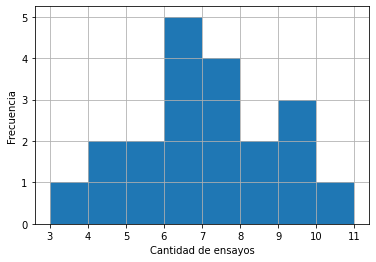

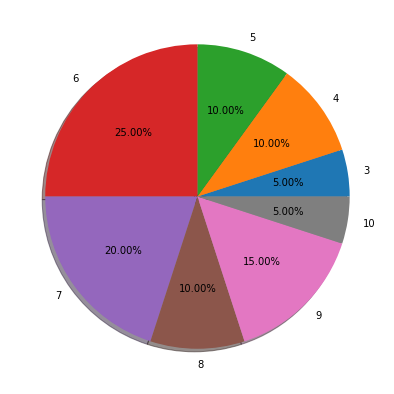

In [ ]:
# c)
# Histograma de frecuencias
plt.hist(X_data, bins=[3,4,5,6,7,8,9,10,11])
plt.grid(True)
plt.xlabel("Cantidad de ensayos")
plt.ylabel("Frecuencia")

# Pie de frecuencias
fig, ax = plt.subplots(figsize=(7,7))
ax.pie(f, labels = [3,4,5,6,7,8,9,10] ,autopct='%.2f%%',shadow=True, labeldistance=1.1)

# plt.savefig('Actividad 1.png')
plt.show()

#### Actividad 2
1) Los niños, a diferencia de los adultos, tienden a recordar las películas, cuentos e historias como una sucesión de acciones más que el argumento en forma global y de conjunto. En el relato de una película, por ejemplo, utilizan con frecuencia las palabras "y entonces...". Una psicóloga con suprema paciencia pidió a 50 niños que le contaran una determinada película que ellos habían visto. Consideró la variable: cantidad de "y entonces..." utilizados en el relato y registró los siguientes datos: 

Los resultados fueron: 

8 15 22 19 15 17 18 20 17 12
16 16 17 21 23 18 20 21 20 20
15 18 17 19 20 23 22 10 17 19
19 21 20 18 18 24 11 19 31 16
17 18 19 20 18 18 40 18 19 16

Como parte del mismo estudio la experimentadora obtuvo de 50 adultos el mismo tipo de datos. Estos fueron: 
 
10 12 5 8 13 10 12 8 7 9
11 10 9 9 11 15 12 17 14 10
9 8 15 16 10 14 7 16 9 1
4 11 12 7 9 10 3 11 14 8
12 5 10 9 7 11 14 10 15 9

    a) Construya la tabla de frecuencias. 
    b) Calcule la moda, la media, y la mediana.
    c) Grafique ambas distribuciones de manera que puedan ser comparadas. 
    d) Los puntos anteriores, ¿qué indican respecto de la conducta observada en niños y adultos?

In [ ]:
X_muestra1 = np.array([8, 15, 22, 19, 15, 17, 18, 20, 17, 12, 16, 16, 17, 21, 23, 18, 20, 21, 20, 20, 15, 18, 17, 19, 20, 23, 22, 10, 17, 19, 19, 21, 20, 18, 18, 24, 11, 19, 31, 16, 17, 18, 19, 20, 18, 18, 40, 18, 19, 16])
X_muestra1 = np.sort(X_muestra1, axis=None)
n1 = X_muestra1.size

X_muestra2 = np.array([10, 12, 5, 8, 13, 10, 12, 8, 7, 9, 11, 10, 9, 9, 11, 15, 12, 17, 14, 10, 9, 8, 15, 16, 10, 14, 7, 16, 9, 1, 4, 11, 12, 7, 9, 10, 3, 11, 14, 8, 12, 5, 10, 9, 7, 11, 14, 10, 15, 9])
X_muestra2 = np.sort(X_muestra2, axis=None)
n2 = X_muestra2.size

print("Muestra 1: ", X_muestra1)
print("Muestra 2: ", X_muestra2)

print("\nTotal muestra 1: ", n1)
print("Total muestra 2: ", n2)

print("\nMenor muestra 1: ", np.min(X_muestra1))
print("Mayor muestra 1: ", np.max(X_muestra1))

print("\nMenor muestra 2: ", np.min(X_muestra2))
print("Mayor muestra 2: ", np.max(X_muestra2))

Muestra 1:  [ 8 10 11 12 15 15 15 16 16 16 16 17 17 17 17 17 17 18 18 18 18 18 18 18
 18 18 19 19 19 19 19 19 19 20 20 20 20 20 20 20 21 21 21 22 22 23 23 24
 31 40]
Muestra 2:  [ 1  3  4  5  5  7  7  7  7  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10
 10 10 10 10 10 11 11 11 11 11 12 12 12 12 12 13 14 14 14 14 15 15 15 16
 16 17]

Total muestra 1:  50
Total muestra 2:  50

Menor muestra 1:  8
Mayor muestra 1:  40

Menor muestra 2:  1
Mayor muestra 2:  17


In [ ]:
# a) Tabla frecuencias
# Muestra 1:

R1 = np.max(X_muestra1) - np.min(X_muestra1)
K1 = np.round(1 + 3.322 * np.log10(X_muestra1.size))
A1 = (R1 / K1) 

print("Rango m1: ", R1)
print("Intervalo m1: ", K1)
print("Amplitud m1: ", A1)

intervalo1 = np.array([8,13,18,23,28,33,38,43])
frec1, bins1 = np.histogram(X_muestra1, bins = intervalo1) # Frecuencia definida por numpy
print("Frecuencia m1: ", frec1)
print("Intervalo m1: ", bins1)

frecrel1 = frec1 / np.sum(X_muestra1.size)
print("Frecuencia relativa m1: ", frecrel1)

frecrelporc1 = frecrel1 * 100
print("Frecuencia porcentual m1: ", frecrelporc1)

Rango m1:  32
Intervalo m1:  7.0
Amplitud m1:  4.571428571428571
Frecuencia m1:  [ 4 13 28  3  1  0  1]
Intervalo m1:  [ 8 13 18 23 28 33 38 43]
Frecuencia relativa m1:  [0.08 0.26 0.56 0.06 0.02 0.   0.02]
Frecuencia porcentual m1:  [ 8. 26. 56.  6.  2.  0.  2.]


In [ ]:
# Muestra 2

R2 = np.max(X_muestra2) - np.min(X_muestra2)
K2 = np.round(1 + 3.322 * np.log10(X_muestra2.size))
A2 = (R2 / K2) 

print("Rango m2: ", R2)
print("Intervalo m2: ", K2)
print("Amplitud m2: ", A2)

# Promedio print(np.sum(X_muestra2) / X_muestra2.size)

intervalo2 = np.array([1,3,5,7,9,11,13,15,17])
frec2, bins2 = np.histogram(X_muestra2, bins = intervalo2) # Frecuencia definida por numpy
print("Frecuencia m2: ", frec2)
print("Intervalo m2: ", bins2)

frecrel2 = frec2 / X_muestra2.size
print("Frecuencia relativa m2: ", frecrel2)

frecrelporc2 = frecrel2 * 100
print("Frecuencia porcentual m2: ", frecrelporc2)

Rango m2:  16
Intervalo m2:  7.0
Amplitud m2:  2.2857142857142856
Frecuencia m2:  [ 1  2  2  8 16 10  5  6]
Intervalo m2:  [ 1  3  5  7  9 11 13 15 17]
Frecuencia relativa m2:  [0.02 0.04 0.04 0.16 0.32 0.2  0.1  0.12]
Frecuencia porcentual m2:  [ 2.  4.  4. 16. 32. 20. 10. 12.]


In [ ]:
# b) Media mediana y moda
# Muestra 1

print("Media: ", (np.sum(X_muestra1) / np.sum(frec1)))
print("Mediana: ", np.median(X_muestra1))
moda = st.mode(X_muestra1)
print("Moda: ", moda)

Media:  18.7
Mediana:  18.0
Moda:  ModeResult(mode=array([18]), count=array([9]))


In [ ]:
# Muestra 2

print("Media: ", (np.sum(X_muestra2) / np.sum(frec2)))
print("Mediana: ", np.median(X_muestra2))
moda = st.mode(X_muestra2)
print("Moda: ", moda)

Media:  10.16
Mediana:  10.0
Moda:  ModeResult(mode=array([9]), count=array([8]))


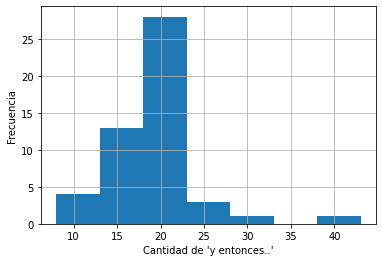

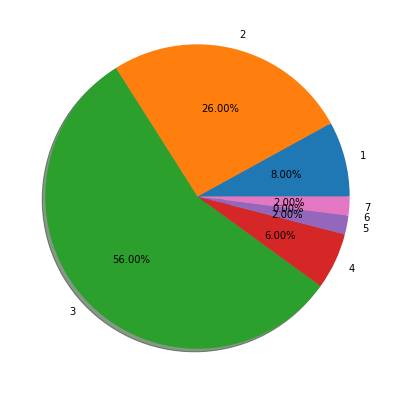

In [ ]:
# c) Grafique ambas distribuciones y compare
# Muestra 1
plt.hist(X_muestra1, bins=bins1)
plt.grid(True)
plt.xlabel("Cantidad de 'y entonces..'")
plt.ylabel("Frecuencia")

plt.savefig('Actividad 2 histograma (Muestra 1).png')
# Pie de frecuencias

fig, ax = plt.subplots(figsize=(7,7))
ax.pie(frec1, labels=[1, 2, 3, 4, 5, 6, 7], autopct='%.2f%%',shadow=True, labeldistance=1.1)

plt.show()

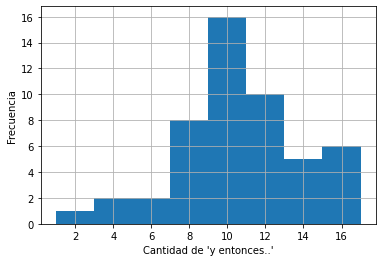

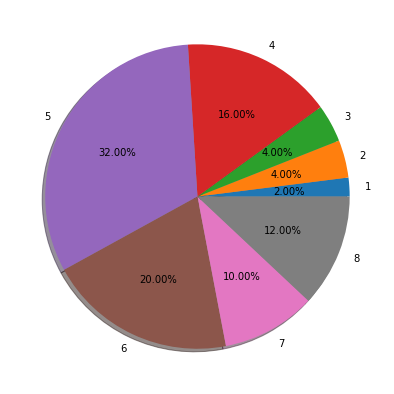

In [ ]:
# Muestra 2
plt.hist(X_muestra2, bins=bins2)
plt.grid(True)
plt.xlabel("Cantidad de 'y entonces..'")
plt.ylabel("Frecuencia")

# Pie de frecuencias

fig, ax = plt.subplots(figsize=(7,7))
ax.pie(frec2, labels=[1, 2, 3, 4, 5, 6, 7, 8], autopct='%.2f%%',shadow=True, labeldistance=1.1)

#plt.savefig('Actividad 2 pie (Muestra 2).png')

plt.show()

#### Actividad 3
3) A fin de decidir cuántos mostradores de servicio se necesitarán en tiendas que serán construidas en el futuro, una cadena de supermercados quiso obtener información acerca del tiempo (en minutos) requerido para atender a los clientes. Se registró la duración de 60 casos:

3.6	1.9	2.1	0.3	0.8	0.2	1.0	1.4	1.8	1.6
1.1	1.8	0.3	1.1	0.5	1.2	0.6	1.1	0.8	1.7
1.4	0.2	1.3	3.1	0.4	2.3	1.8	4.5	0.9	0.7
0.6	2.8	2.5	1.1	0.4	1.2	0.4	1.3	0.8	1.3
1.1	1.2	0.8	1.0	0.9	0.7	3.1	1.7	1.1	2.2
1.6	1.9	5.2	0.5	1.8	0.3	1.1	0.6	0.7	0.6

    a)	¿Cuál es la variable a analizar? ¿Es cuantitativa o cualitativa?
    b)	Organizarlos de la manera que le resulte más conveniente (de forma simple o en intervalos) y justificar la organización elegida.
    c)	Calcule los valores de posición y dispersión. Cuáles de estos valores tomará como represntativos? justifique
    d)	Representar gráficamente las frecuencias anteriores mediante un histograma y un polígono de frecuencias.
    e)	Construir las frecuencias acumuladas crecientes, y graficarlas mediante una ojiva.
    f)	Calcule los cuartiles, e indique qué información le proporciona.
    g)	¿Qué proporción de los tiempos de servicio es menor a un minuto?

In [ ]:
X_muestra = np.array([3.6, 1.9, 2.1, 0.3, 0.8, 0.2, 1.0, 1.4, 1.8, 1.6, 1.1, 1.8, 0.3, 1.1, 0.5, 1.2, 0.6, 1.1, 0.8, 1.7, 1.4, 0.2, 1.3, 3.1, 0.4, 2.3, 1.8, 4.5, 0.9, 0.7, 0.6, 2.8, 2.5, 1.1, 0.4, 1.2, 0.4, 1.3, 0.8, 1.3, 1.1, 1.2, 0.8, 1.0, 0.9, 0.7, 3.1, 1.7, 1.1, 2.2, 1.6, 1.9, 5.2, 0.5, 1.8, 0.3, 1.1, 0.6, 0.7, 0.6])
X_muestra = np.sort(X_muestra, axis=None)
n = X_muestra.size

print("Muestra 1: ", X_muestra)
print("\nTotal muestra 1: ", n)
print("\nMenor muestra 1: ", np.min(X_muestra))
print("Mayor muestra 1: ", np.max(X_muestra))

Muestra 1:  [0.2 0.2 0.3 0.3 0.3 0.4 0.4 0.4 0.5 0.5 0.6 0.6 0.6 0.6 0.7 0.7 0.7 0.8
 0.8 0.8 0.8 0.9 0.9 1.  1.  1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.2 1.2 1.2 1.3
 1.3 1.3 1.4 1.4 1.6 1.6 1.7 1.7 1.8 1.8 1.8 1.8 1.9 1.9 2.1 2.2 2.3 2.5
 2.8 3.1 3.1 3.6 4.5 5.2]

Total muestra 1:  60

Menor muestra 1:  0.2
Mayor muestra 1:  5.2


In [ ]:
# Describe data (Quartiles, min, max, media, count)

data = pd.Series(X_muestra)
data.describe()

count    60.000000
mean      1.366667
std       1.002652
min       0.200000
25%       0.700000
50%       1.100000
75%       1.800000
max       5.200000
dtype: float64

In [ ]:
# b) Tabla frecuencias
# Muestra:

R = np.max(X_muestra) - np.min(X_muestra)
K = np.round(1 + 3.322 * np.log10(X_muestra.size))
A = (R / K) 

print("Rango: ", R)
print("Intervalo: ", K)
print("Amplitud: ", A)

Rango:  5.0
Intervalo:  7.0
Amplitud:  0.7142857142857143


In [ ]:
intervalo = np.array([0.2,1,1.8,2.6,3.4,4.2,5,5.8])
frec, bins = np.histogram(X_muestra, bins = intervalo) # Frecuencia definida por numpy
print("Frecuencia: ", frec)
print("Intervalo: ", bins)

frecrel = frec / np.sum(X_muestra.size)
print("Frecuencia relativa: ", frecrel)

frecrelporc = frecrel * 100
print("Frecuencia relativa: ", frecrelporc)

Frecuencia:  [23 21 10  3  1  1  1]
Intervalo:  [0.2 1.  1.8 2.6 3.4 4.2 5.  5.8]
Frecuencia relativa:  [0.38333333 0.35       0.16666667 0.05       0.01666667 0.01666667
 0.01666667]
Frecuencia relativa:  [38.33333333 35.         16.66666667  5.          1.66666667  1.66666667
  1.66666667]


In [ ]:
# c) 
# Media mediana y moda
# Muestra 

media = (np.sum(X_muestra) / np.sum(frec))
print("Media: ", media)

print("Mediana: ", np.median(X_muestra))

moda = st.mode(X_muestra)
print("Moda: ", moda)

Media:  1.3666666666666665
Mediana:  1.1
Moda:  ModeResult(mode=array([1.1]), count=array([7]))


In [ ]:
# Valores de dispercion
dm = np.sum(np.abs(X_muestra - media)) / X_muestra.size # la suma del valor absouluto menos el promedio dividido entre el tamaño de muestra
print("\nDesviacion media: ", dm)

p = np.sum(X_muestra) / X_muestra.size # Promedio
print("\nPromedio: ", p)

S = np.sum(np.square(X_muestra - p)) / X_muestra.size # Varianza
print("\nVarianza: ", S)

r = np.sqrt(S) # Desvio estandar
print("\nDesvio estandar: ", r)

coeficientevar = (r / media) * 100
print("\nCoeficiente de variacion: ", coeficientevar)


Desviacion media:  0.7244444444444444

Promedio:  1.3666666666666665

Varianza:  0.9885555555555556

Desvio estandar:  0.9942613115049562

Coeficiente de variacion:  72.75082767109437


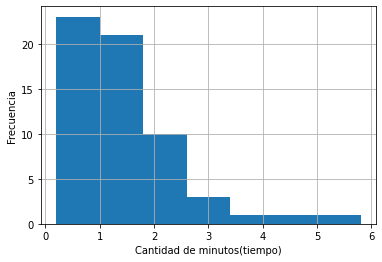

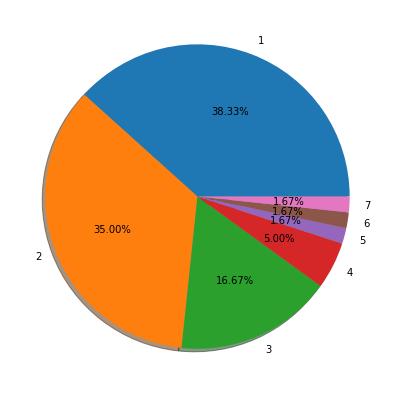

In [ ]:
# d)

# Muestra
plt.hist(X_muestra, bins=intervalo)
plt.grid(True)
plt.xlabel("Cantidad de minutos(tiempo)")
plt.ylabel("Frecuencia")

# Pie de frecuencias
fig, ax = plt.subplots(figsize=(7,7))
ax.pie(frec, labels=[1, 2, 3, 4, 5, 6, 7], autopct='%.2f%%',shadow=True, labeldistance=1.1)

plt.show()

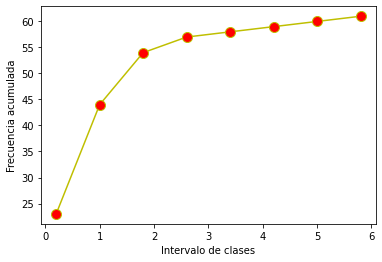

In [ ]:
# e)
# Ojiva

y = np.array([23, 44, 54, 57, 58, 59, 60, 61]) # Frecuencia acumulada

plt.plot(intervalo, y, c='y', marker='o', ms=10, mfc='red')
plt.xlabel('Intervalo de clases')
plt.ylabel('Frecuencia acumulada')

#plt.savefig('Actividad 3 Ojiva (Muestra).png')
plt.show()

In [ ]:
# f)
# Muestra

Q3 = 3 * np.sum(frec) / 4
print("Posicion Q3: ", Q3)

Q2 = 2 * np.sum(frec) / 4
print("Posicion Q2: ", Q2)

Q1 = 1 * np.sum(frec) / 4
print("Posicion Q1: ", Q1)

print(np.percentile(X_muestra, 75))
print(np.percentile(X_muestra, 50))
print(np.percentile(X_muestra, 25))

Posicion Q3:  45.0
Posicion Q2:  30.0
Posicion Q1:  15.0
1.8
1.1
0.7


In [ ]:
# Percentiles 
print(np.percentile(X_muestra, [0, 10, 20, 30, 40, 50, 60, 70 ,80, 90, 100]))

[0.2  0.4  0.6  0.8  1.   1.1  1.3  1.63 1.82 2.53 5.2 ]


#### Actividad 4
4) Una empresa consultora ha entrevistado un grupo de 50 personas a las cuales les han preguntado la edad. Se obtuvieron los siguientes datos:

23	34	21	41	42	35	32	36	27	20
19	31	39	38	41	26	24	27	30	33
23	32	40	34	25	28	29	30	22	24
26	36	38	21	39	22	33	35	32	28
27	26	24	32	37	39	32	24	35	26

Se ha decidido organizar los datos en intervalos. A partir de estos datos, ya organizados, determine:

    a)	Valores de posición: media, mediana y moda. Cuál tomará como representativo de la distribución?
    b)	Valores de Dispersión. Cuál tomará como represntativo?
    c)	Cuartiles. Qué información le proporcionan?
    d)	Representar gráficamente las frecuencias acumuladas.
    e)	Obtener conclusiones.

In [ ]:
X = np.array([23, 34, 21, 41, 42, 35, 32, 36, 27, 20, 19, 31, 39, 38, 41, 26, 24, 27, 30, 33, 23, 32, 40, 34, 25, 28, 29, 30, 22, 24, 26, 36, 38, 21, 39, 22, 33, 35, 32, 28, 27, 26, 24, 32, 37, 39, 32, 24, 35, 26])
X = np.sort(X, axis=None)
n = X.size

print("Muestra: ", X)
print("\nTotal muestra: ", n)
print("\nMenor muestra: ", np.min(X))
print("Mayor muestra: ", np.max(X))

Muestra:  [19 20 21 21 22 22 23 23 24 24 24 24 25 26 26 26 26 27 27 27 28 28 29 30
 30 31 32 32 32 32 32 33 33 34 34 35 35 35 36 36 37 38 38 39 39 39 40 41
 41 42]

Total muestra:  50

Menor muestra:  19
Mayor muestra:  42


In [ ]:
Xpandas = pd.Series(X)
Xpandas.describe()

count    50.000000
mean     30.360000
std       6.381606
min      19.000000
25%      25.250000
50%      30.500000
75%      35.000000
max      42.000000
dtype: float64

In [ ]:
# a) Tabla frecuencias
# Muestra:

R = np.max(X) - np.min(X)
K = (1 + 3.322 * np.log10(X.size))
A = (R / K) 

print("Rango: ", R)
print("Intervalo: ", np.round(K))
print("Amplitud: ", A)

Rango:  23
Intervalo:  7.0
Amplitud:  3.461781296255042


In [ ]:
intervalo = np.array([19,23,27,31,35,39,43,47])
frec, bins = np.histogram(X, bins = intervalo) # Frecuencia definida por numpy
print("Frecuencia: ", frec)
print("Intervalo: ", bins)

frecrel = frec / np.sum(X.size)
print("Frecuencia relativa: ", frecrel)

frecrelporc = frecrel * 100
print("Frecuencia relativa: ", frecrelporc)

Frecuencia:  [ 6 11  8 10  8  7  0]
Intervalo:  [19 23 27 31 35 39 43 47]
Frecuencia relativa:  [0.12 0.22 0.16 0.2  0.16 0.14 0.  ]
Frecuencia relativa:  [12. 22. 16. 20. 16. 14.  0.]


In [ ]:
# a) 
# Media mediana y moda
# Muestra 

media = (np.sum(X) / np.sum(frec))
print("Media: ", media)

print("Mediana: ", np.median(X))

moda = st.mode(X)
print("Moda: ", moda)

Media:  30.36
Mediana:  30.5
Moda:  ModeResult(mode=array([32]), count=array([5]))


In [ ]:
# b) Valores de dispercion

p = np.sum(X) / X.size # Promedio
print("\nPromedio: ", p)

dm = np.sum(np.abs(X - p)) / X.size # la suma del valor absouluto menos el promedio dividido entre el tamaño de muestra
print("\nDesviacion media: ", dm)

S = np.sum(np.square(X - p)) / X.size # Varianza
print("\nVarianza: ", S)

r = np.sqrt(S) # Desvio estandar
print("\nDesvio estandar: ", r)

coeficientevar = (r / media) * 100
print("\nCoeficiente de variacion: ", coeficientevar)


Promedio:  30.36

Desviacion media:  5.48

Varianza:  39.9104

Desvio estandar:  6.317467847167883

Coeficiente de variacion:  20.808523870776956


In [ ]:
np.sum(np.abs(X - media))

274.0

In [ ]:
# c) Cuartiles
# Muestra

Q3 = 3 * np.sum(frec) / 4
print("Posicion Q3: ", Q3)

Q2 = 2 * np.sum(frec) / 4
print("Posicion Q2: ", Q2)

Q1 = 1 * np.sum(frec) / 4
print("Posicion Q1: ", Q1)

print(np.percentile(X, 75))
print(np.percentile(X, 50))
print(np.percentile(X, 25))

Posicion Q3:  37.5
Posicion Q2:  25.0
Posicion Q1:  12.5
35.0
30.5
25.25


In [ ]:
# Percentiles 
print(np.percentile(X, [0, 10, 20, 30, 40, 50, 60, 70 ,80, 90, 100]))

[19.  22.  24.  26.  27.6 30.5 32.  34.3 36.2 39.  42. ]


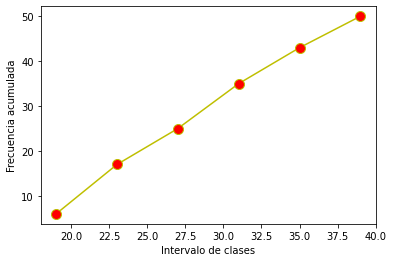

In [ ]:
# d) Frecuencias acumuladas: Ojiva
# Ojiva

y = np.array([6, 17, 25, 35, 43, 50]) # Frecuencia acumulada

intervalonew = np.array([19,23,27,31,35,39])
plt.plot(intervalonew, y, c='y', marker='o', ms=10, mfc='red')
plt.xlabel('Intervalo de clases')
plt.ylabel('Frecuencia acumulada')

plt.savefig('Actividad 4 Ojiva (Muestra).png')
plt.show()

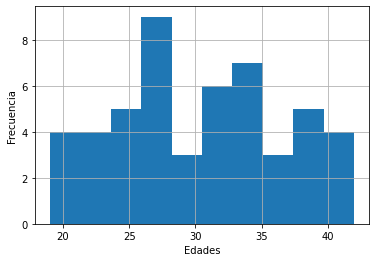

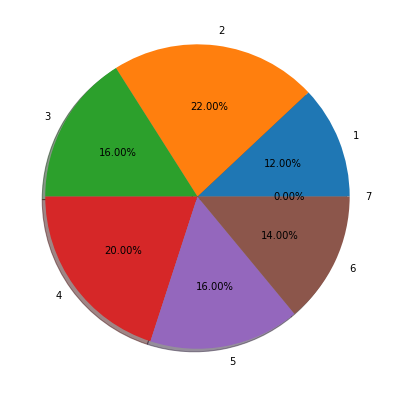

In [ ]:
# Muestra
plt.hist(X)
plt.grid(True)
plt.xlabel("Edades")
plt.ylabel("Frecuencia")

# Pie de frecuencias
fig, ax = plt.subplots(figsize=(7,7))
ax.pie(frec, labels=[1, 2, 3, 4, 5, 6, 7], autopct='%.2f%%',shadow=True, labeldistance=1.1)

plt.show()